In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from pagerank import powerIteration

In [2]:
# 2017 - Importing Data
data_2017_know = pd.read_csv("data/2017_know.csv", index_col=0)
data_2017_like = pd.read_csv("data/2017_like.csv", index_col=0)
data_2017_contact = pd.read_csv("data/2017_contact.csv", index_col=0)
data_2017_trust = pd.read_csv("data/2017_trust.csv", index_col=0)
data_2017_support = pd.read_csv("data/2017_support.csv", index_col=0)

# 2019 - Importing Data
data_2019_know = pd.read_csv("data/2019_know.csv", index_col=0)
data_2019_like = pd.read_csv("data/2019_like.csv", index_col=0)
data_2019_contact = pd.read_csv("data/2019_contact.csv", index_col=0)
data_2019_trust = pd.read_csv("data/2019_trust.csv", index_col=0)
data_2019_support = pd.read_csv("data/2019_support.csv", index_col=0)

# Differences
data_diff_know = data_2019_know.sub(data_2017_know)
data_diff_like = data_2019_like.sub(data_2017_like)
data_diff_contact = data_2019_contact.sub(data_2017_contact)
data_diff_trust = data_2019_trust.sub(data_2017_trust)
data_diff_support = data_2019_support.sub(data_2017_support)

# Means (OUTWARD)
avg_out_data_2017_know = data_2017_know.mean(axis=1)
avg_out_data_2017_like = data_2017_like.mean(axis=1)
avg_out_data_2017_contact = data_2017_contact.mean(axis=1)
avg_out_data_2017_trust = data_2017_trust.mean(axis=1)
avg_out_data_2017_support = data_2017_support.mean(axis=1)
avg_out_data_2017_all = pd.concat([avg_out_data_2017_know, avg_out_data_2017_like, avg_out_data_2017_contact, avg_out_data_2017_trust, avg_out_data_2017_support], axis=1, join='inner')
avg_out_data_2017_all.columns = ['knowing_2017', 'liking_2017', 'contacting_2017', 'trusting_2017', 'asking_2017']

avg_out_data_2019_know = data_2019_know.mean(axis=1)
avg_out_data_2019_like = data_2019_like.mean(axis=1)
avg_out_data_2019_contact = data_2019_contact.mean(axis=1)
avg_out_data_2019_trust = data_2019_trust.mean(axis=1)
avg_out_data_2019_support = data_2019_support.mean(axis=1)
avg_out_data_2019_all = pd.concat([avg_out_data_2019_know, avg_out_data_2019_like, avg_out_data_2019_contact, avg_out_data_2019_trust, avg_out_data_2019_support], axis=1, join='inner')
avg_out_data_2019_all.columns = ['knowing_2019', 'liking_2019', 'contacting_2019', 'trusting_2019', 'asking_2019']

avg_out_data_diff_know = data_diff_know.mean(axis=1)
avg_out_data_diff_like = data_diff_like.mean(axis=1)
avg_out_data_diff_contact = data_diff_contact.mean(axis=1)
avg_out_data_diff_trust = data_diff_trust.mean(axis=1)
avg_out_data_diff_support = data_diff_support.mean(axis=1)
avg_out_data_diff_all = pd.concat([avg_out_data_diff_know, avg_out_data_diff_like, avg_out_data_diff_contact, avg_out_data_diff_trust, avg_out_data_diff_support], axis=1, join='inner')
avg_out_data_diff_all.columns = ['knowing_diff', 'liking_diff', 'contacting_diff', 'trusting_diff', 'asking_diff']

avg_out_data_all_all = pd.concat([avg_out_data_2017_all, avg_out_data_2019_all, avg_out_data_diff_all], axis=1, join='inner')
avg_out_data_all_all

,knowing_2017,liking_2017,contacting_2017,trusting_2017,asking_2017,knowing_2019,liking_2019,contacting_2019,trusting_2019,asking_2019,knowing_diff,liking_diff,contacting_diff,trusting_diff,asking_diff
Steph,2.769231,3.153846,1.846154,2.692308,1.923077,2.538462,3.461538,1.000000,2.923077,1.076923,-0.230769,0.307692,-0.846154,0.230769,-0.846154
Emma,3.461538,4.153846,2.307692,3.846154,2.615385,2.384615,3.692308,1.538462,2.538462,1.384615,-1.076923,-0.461538,-0.769231,-1.307692,-1.230769
Gabby,3.923077,4.692308,2.384615,4.000000,2.692308,3.461538,4.230769,1.615385,3.384615,2.153846,-0.461538,-0.461538,-0.769231,-0.615385,-0.538462
Cam,4.307692,4.384615,2.230769,3.230769,2.230769,4.230769,4.230769,2.538462,3.153846,2.769231,-0.076923,-0.153846,0.307692,-0.076923,0.538462
Andrew,3.384615,4.000000,1.692308,3.461538,1.923077,3.538462,3.769231,1.846154,3.230769,1.538462,0.153846,-0.230769,0.153846,-0.230769,-0.384615
Isaac,3.769231,3.692308,1.923077,3.538462,2.000000,3.000000,3.615385,2.230769,3.307692,2.230769,-0.769231,-0.076923,0.307692,-0.230769,0.230769
Alex,4.000000,4.538462,1.769231,3.692308,2.692308,3.230769,3.307692,1.538462,2.461538,2.076923,-0.769231,-1.230769,-0.230769,-1.230769,-0.615385
Arielle,3.538462,4.615385,1.538462,4.076923,1.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,4.230769,4.615385,2.153846,4.076923,1.615385,3.615385,4.076923,2.000000,3.769231,1.076923,-0.615385,-0.538462,-0.153846,-0.307692,-0.538462
James,4.230769,4.076923,2.153846,3.153846,2.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
avg_out_data_all_all.corr()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.

,knowing_2017,liking_2017,contacting_2017,trusting_2017,asking_2017,knowing_2019,liking_2019,contacting_2019,trusting_2019,asking_2019,knowing_diff,liking_diff,contacting_diff,trusting_diff,asking_diff
knowing_2017,1.000000,0.762851,0.440596,0.460699,0.282500,0.778476,0.591274,0.673134,0.534196,0.466847,-0.210847,-0.617567,0.196117,-0.183798,0.256769
liking_2017,0.762851,1.000000,0.317609,0.797735,0.133183,0.667057,0.585572,0.399715,0.410214,0.264485,-0.197288,-0.783935,-0.071000,-0.419204,-0.066766
contacting_2017,0.440596,0.317609,1.000000,0.279676,0.464748,0.356455,0.717571,0.216303,0.506789,0.044422,-0.217534,-0.170061,-0.528672,-0.025529,-0.170873
trusting_2017,0.460699,0.797735,0.279676,1.000000,0.064985,0.341696,0.416123,0.269438,0.459779,0.012603,-0.499565,-0.723456,-0.147801,-0.520091,-0.300878
asking_2017,0.282500,0.133183,0.464748,0.064985,1.000000,-0.034664,-0.015404,-0.176068,-0.341005,0.433465,-0.474754,-0.551447,-0.351571,-0.713024,-0.331058
knowing_2019,0.778476,0.667057,0.356455,0.341696,-0.034664,1.000000,0.696423,0.717404,0.637660,0.466441,0.449424,-0.288711,0.368236,0.284486,0.515617
liking_2019,0.591274,0.585572,0.717571,0.416123,-0.015404,0.696423,1.000000,0.530679,0.698698,0.242819,0.243072,0.044218,-0.052927,0.271570,0.266345
contacting_2019,0.673134,0.399715,0.216303,0.269438,-0.176068,0.717404,0.530679,1.000000,0.458343,0.595592,0.159244,-0.086175,0.714378,0.181553,0.761844
trusting_2019,0.534196,0.410214,0.506789,0.459779,-0.341005,0.637660,0.698698,0.458343,1.000000,-0.078637,0.232792,0.029568,0.035258,0.519352,0.185327
asking_2019,0.466847,0.264485,0.044422,0.012603,0.433465,0.466441,0.242819,0.595592,-0.078637,1.000000,0.061994,-0.139984,0.485975,-0.087761,0.706851


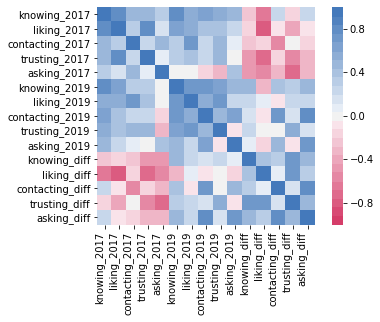

In [4]:
ax = sns.heatmap(
    avg_out_data_all_all.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [5]:
# Means (OUTWARD)
pr_out_data_2017_know = powerIteration(data_2017_know)
pr_out_data_2017_like = powerIteration(data_2017_like)
pr_out_data_2017_contact = powerIteration(data_2017_contact)
pr_out_data_2017_trust = powerIteration(data_2017_trust)
pr_out_data_2017_support = powerIteration(data_2017_support)
pr_out_data_2017_all = pd.concat([pr_out_data_2017_know, pr_out_data_2017_like, pr_out_data_2017_contact, pr_out_data_2017_trust, pr_out_data_2017_support], axis=1, join='inner')
pr_out_data_2017_all.columns = ['knowing_2017', 'liking_2017', 'contacting_2017', 'trusting_2017', 'asking_2017']

pr_out_data_2019_know = powerIteration(data_2019_know)
pr_out_data_2019_like = powerIteration(data_2019_like)
pr_out_data_2019_contact = powerIteration(data_2019_contact)
pr_out_data_2019_trust = powerIteration(data_2019_trust)
pr_out_data_2019_support = powerIteration(data_2019_support)
pr_out_data_2019_all = pd.concat([pr_out_data_2019_know, pr_out_data_2019_like, pr_out_data_2019_contact, pr_out_data_2019_trust, pr_out_data_2019_support], axis=1, join='inner')
pr_out_data_2019_all.columns = ['knowing_2019', 'liking_2019', 'contacting_2019', 'trusting_2019', 'asking_2019']

pr_out_data_diff_know = powerIteration(data_diff_know)
pr_out_data_diff_like = powerIteration(data_diff_like)
pr_out_data_diff_contact = powerIteration(data_diff_contact)
pr_out_data_diff_trust = powerIteration(data_diff_trust)
pr_out_data_diff_support = powerIteration(data_diff_support)
pr_out_data_diff_all = pd.concat([pr_out_data_diff_know, pr_out_data_diff_like, pr_out_data_diff_contact, pr_out_data_diff_trust, pr_out_data_diff_support], axis=1, join='inner')
pr_out_data_diff_all.columns = ['knowing_diff', 'liking_diff', 'contacting_diff', 'trusting_diff', 'asking_diff']

pr_out_data_all_all = pd.concat([pr_out_data_2017_all, pr_out_data_2019_all, pr_out_data_diff_all], axis=1, join='inner')
pr_out_data_all_all

,knowing_2017,liking_2017,contacting_2017,trusting_2017,asking_2017,knowing_2019,liking_2019,contacting_2019,trusting_2019,asking_2019,knowing_diff,liking_diff,contacting_diff,trusting_diff,asking_diff
Steph,0.071081,0.071654,0.077483,0.078023,0.070976,0.064644,0.071578,0.060897,0.069156,0.061101,-3.863896e+20,0.091616,0.040521,2.937218e+190,0.053373
Emma,0.067573,0.075167,0.061005,0.079309,0.075109,0.068279,0.074154,0.064181,0.078591,0.073131,-7.110098e+19,0.071358,0.092199,7.632217e+190,0.086175
Gabby,0.078014,0.076961,0.096908,0.081326,0.087736,0.081540,0.074252,0.077870,0.080773,0.079819,9.842458e+20,0.033060,-0.024872,-4.605675e+190,0.111249
Cam,0.083307,0.076868,0.095811,0.082933,0.095395,0.084747,0.073598,0.090393,0.074154,0.089591,5.103148e+20,-0.007075,0.066718,-1.577777e+191,0.112123
Andrew,0.068307,0.070102,0.066945,0.068029,0.068847,0.071652,0.068187,0.078473,0.065596,0.075185,5.802717e+20,0.016969,0.090567,-4.995939e+190,0.123044
Isaac,0.078292,0.071840,0.088954,0.072400,0.087159,0.080304,0.070445,0.094190,0.070453,0.086088,7.056521e+19,0.072935,0.092137,-8.198125e+189,0.069018
Alex,0.064576,0.068777,0.068506,0.066819,0.070368,0.065784,0.069591,0.061521,0.072132,0.061995,3.973965e+20,0.081954,0.046828,6.647783e+190,0.002783
Arielle,0.062643,0.077967,0.060029,0.082595,0.093887,0.064821,0.078466,0.066057,0.082467,0.075909,2.840914e+20,0.148527,0.025169,9.071372e+190,0.103810
Liam,0.064306,0.066715,0.050819,0.059659,0.049379,0.067838,0.066465,0.068315,0.065325,0.061425,-3.339063e+20,0.023749,0.149700,-3.115318e+190,0.063201
James,0.077626,0.074821,0.078608,0.072426,0.066255,0.079473,0.079449,0.072346,0.080369,0.080025,-3.271709e+20,0.029791,0.119861,-6.705648e+189,0.033073


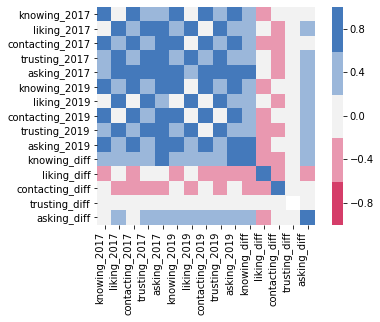

In [6]:
ax = sns.heatmap(
    pr_out_data_all_all.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=5),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);